In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

### 1. 讀入 CIFAR-10 數據集

CIFAR-10 是一個小尺吋（32x32）彩色圖片資料集，其中，訓練集包含了 50000 張大小為 32x32 的彩色圖片；測試集包含了 10000 張大小為 32x32 的彩色圖片。CIFAR-10 的圖片資料可分為以下 10 個種類：
* 飛機 (airplan)
* 汽車 (automobile)
* 鳥 (bird)
* 貓 (cat)
* 鹿 (deer)
* 狗 (dog)
* 青蛙 (frog)
* 馬 (horse)
* 船 (ship)
* 卡車 (truck)

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. 資料整理

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
y_train.shape

(50000, 10)

### 3. step 1: 打造函數學習機 (CNN)

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(16, (5, 5), padding='same',
                 input_shape=(32, 32, 3),
                 activation='relu'))

In [11]:
model.add(MaxPool2D())

In [12]:
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))

In [13]:
model.add(MaxPool2D())

In [14]:
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D())

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

#### 組裝

In [19]:
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

### 4. step 2: fit

In [20]:
model.fit(x_train, y_train, batch_size=100, epochs=30)

Epoch 1/30
500/500 [==============================] - 13s 8ms/step - loss: 0.0728 - accuracy: 0.4012
Epoch 2/30
500/500 [==============================] - 3s 6ms/step - loss: 0.0588 - accuracy: 0.5465
Epoch 3/30
500/500 [==============================] - 3s 5ms/step - loss: 0.0511 - accuracy: 0.6152
Epoch 4/30
500/500 [==============================] - 3s 6ms/step - loss: 0.0462 - accuracy: 0.6573
Epoch 5/30
500/500 [==============================] - 2s 5ms/step - loss: 0.0422 - accuracy: 0.6918
Epoch 6/30
500/500 [==============================] - 2s 5ms/step - loss: 0.0392 - accuracy: 0.7182
Epoch 7/30
500/500 [==============================] - 2s 5ms/step - loss: 0.0365 - accuracy: 0.7368
Epoch 8/30
500/500 [==============================] - 3s 5ms/step - loss: 0.0346 - accuracy: 0.7535
Epoch 9/30
500/500 [==============================] - 3s 6ms/step - loss: 0.0321 - accuracy: 0.7732
Epoch 10/30
500/500 [==============================] - 2s 5ms/step - loss: 0.0305 - accuracy: 0.786

### 5. Step 3: 預測

In [21]:
x_test[5].shape

(32, 32, 3)

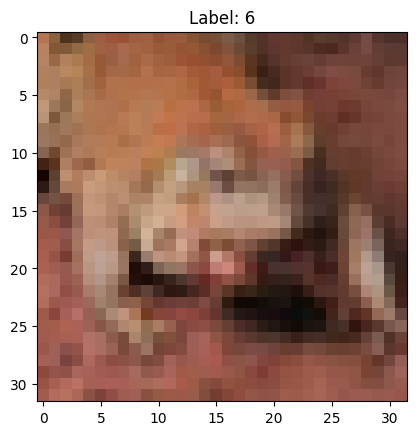

In [22]:
plt.imshow(x_test[5])
plt.title(f"Label: {y_test[5].argmax()}");

In [23]:
inp = x_test[5].reshape(1, 32, 32, 3)

In [24]:
model.predict(inp)

1/1 [==============================] - 0s 193ms/step


array([[3.9637764e-04, 3.9867242e-03, 4.9277613e-05, 2.6203262e-02,
        5.6083472e-03, 2.8788906e-03, 9.4947511e-01, 1.0121080e-02,
        4.3288728e-05, 1.2375638e-03]], dtype=float32)

In [25]:
np.argmax(model.predict(inp), axis=-1)

1/1 [==============================] - 0s 18ms/step


array([6])

In [26]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


神經網路預測是: 6


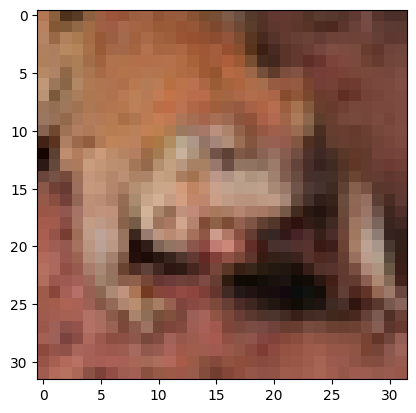

In [27]:
n = 5

print('神經網路預測是:', y_predict[n])
plt.imshow(x_test[n], cmap='Greys');

In [28]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.6967


In [29]:
print(f"loss: {score[0]}")
print(f"正確率: {score[1]*100:.2f}%")

loss: 0.04845753312110901
正確率: 69.67%


In [30]:
from ipywidgets import interact_manual

In [31]:
class_name = ['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']

In [32]:
def test(測試編號):
    plt.imshow(x_test[測試編號], cmap='Greys')
    print('神經網路判斷為:', class_name[y_predict[測試編號]])

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

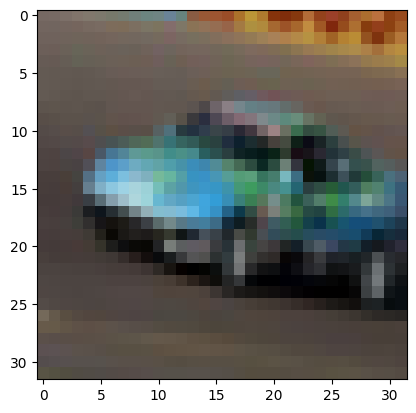

In [36]:
interact_manual(test, 測試編號=(0, 9999));